In [1]:
%run '../ego.py'
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
%run '../preprocess.py'
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
sns.set_style('ticks');
sns.set_palette('Set1')
import json

E:\ProgramFiles_w\Engineering\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [49]:
pre = Preprocess(pca_model='../eco_full_pca.pkl', all_dat='../all_games.pkl')
# pre = Preprocess()
# pre.get_json('../alluser_control.json')  # uncomment this to create the pkl file needed!!
# pre.train_pca()
X, y = pre.ready_player_one(2)

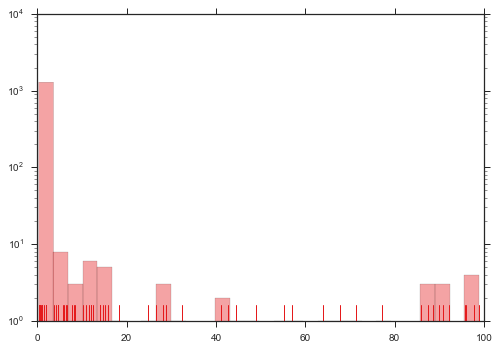

In [33]:
all_sigs = np.loadtxt('opt_sig_allplays.txt')
all_improv = np.loadtxt('opt_f_allplays.txt')

n_comp = 19
# mask = all_improv !=0
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.distplot(all_sigs[:,n_comp][mask], bins = 30, kde=False, hist_kws={'log':True}, rug = True)
# plt.plot(all_sigs[:,30])

In [14]:
all_sigs[:,30].shape

(2250L,)

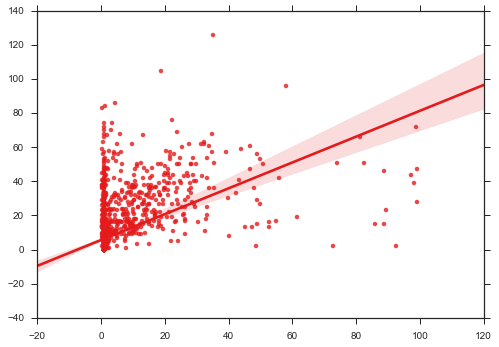

In [45]:
n_comp=30
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.regplot(all_sigs[:,n_comp][mask], -1*all_improv[mask])

In [54]:
opt_sigs = pd.DataFrame(all_sigs, columns=["comp"+str(i+1) for i in range(31)])
opt_sigs['expected'] = -1*all_improv
opt_sigs['score'] = pre.full_tab['rem_nrg'].values

In [55]:
opt_sigs

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,...,comp24,comp25,comp26,comp27,comp28,comp29,comp30,comp31,expected,score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0,0.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0,0.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0,0.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0,0.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0,5.454545
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0,0.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0,14.545455
7,0.010000,0.010000,0.937637,0.010000,0.010000,0.010000,0.782451,0.010000,0.010000,0.010000,...,0.010000,0.629136,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,8,0.000000
8,100.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,100.000000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,19,0.000000
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,18,0.000000


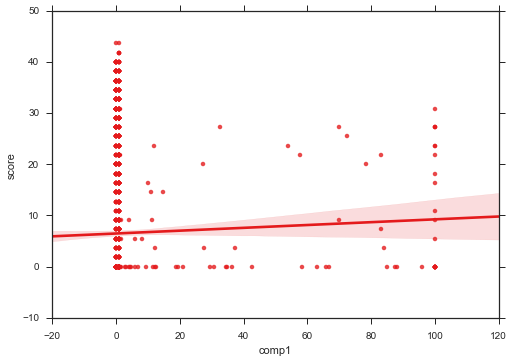

In [58]:
n_comp=1
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.regplot('comp'+str(n_comp),'score',data=opt_sigs)